## Load and preview dataset

In [1]:
import pandas as pd

RawData_path = "C:\\Data\\Precipitation Prediction course_Complete\\Seattle Raw data\\Seattle Prec_1948-2017.csv"
df_raw = pd.read_csv(RawData_path)
df_raw

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


source = https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017

DATE = the date of the observation

PRCP = the amount of precipitation, in inches

TMAX = the maximum temperature for that day, in degrees Fahrenheit

TMIN = the minimum temperature for that day, in degrees Fahrenheit

RAIN = TRUE if rain was observed on that day, FALSE if it was not

## Check for invalid rows (Nans, Nulls, Nones, empty strings)

In [2]:
# Check for NaN, Null, None
print("\n--- Checking for NaN/Null/None ---")
print("\nMissing values per column:")
for col in df_raw.columns:
    null_count = df_raw[col].isnull().sum()
    if null_count > 0:
        print(f"  {col}: {null_count} null values ✖")
    else:
        print(f"  {col}: 0 null values ✓")

print(f"\nTotal NaN/Null/None values: {df_raw.isnull().sum().sum()}")

# Check for empty strings
print("\n--- Checking for empty strings ---")
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':  # Only check string columns
        # Safely check for empty strings
        empty_count = (df_raw[col].astype(str) == "").sum()
        space_count = (df_raw[col].astype(str) == " ").sum()
        
        # Check for whitespace-only strings
        try:
            whitespace_count = df_raw[col].astype(str).str.strip().eq("").sum()
        except:
            whitespace_count = 0
        
        total_empty = empty_count + space_count
        
        if total_empty > 0:
            print(f"  {col}: {empty_count} empty (\"\"), {space_count} single space (\" \"), {whitespace_count} whitespace-only")
        else:
            print(f"  {col}: 0 empty strings ✓")

# Show rows with invalid values
print("\n--- Rows with invalid values ---")
invalid_rows = df_raw[df_raw.isnull().any(axis=1)]
if len(invalid_rows) > 0:
    print(f"\nFound {len(invalid_rows)} rows with invalid values:")
    print(invalid_rows.head(10))
    if len(invalid_rows) > 10:
        print(f"\n... and {len(invalid_rows) - 10} more rows")
else:
    print("\nNo rows with invalid values ✓")


--- Checking for NaN/Null/None ---

Missing values per column:
  DATE: 0 null values ✓
  PRCP: 3 null values ✖
  TMAX: 0 null values ✓
  TMIN: 0 null values ✓
  RAIN: 3 null values ✖

Total NaN/Null/None values: 6

--- Checking for empty strings ---
  DATE: 0 empty strings ✓
  RAIN: 0 empty strings ✓

--- Rows with invalid values ---

Found 3 rows with invalid values:
             DATE  PRCP  TMAX  TMIN RAIN
18415  1998-06-02   NaN    72    52  NaN
18416  1998-06-03   NaN    66    51  NaN
21067  2005-09-05   NaN    70    52  NaN


## Fill invalids

In [3]:
# Define feature columns to fill
feature_columns = ['PRCP', 'TMAX', 'TMIN', 'RAIN']

# Fill NaN/Null/None with 0
print(f"\nFilling NaN/Null/None values with 0 in columns: {feature_columns}")
for col in feature_columns:
    if col in df_raw.columns:
        before = df_raw[col].isnull().sum()
        df_raw[col] = df_raw[col].fillna(0)
        after = df_raw[col].isnull().sum()
        print(f"  {col}: filled {before} values")

# Replace empty strings with 0
print(f"\nReplacing empty strings with 0 in columns: {feature_columns}")
for col in feature_columns:
    if col in df_raw.columns and df_raw[col].dtype == 'object':
        # Replace various empty string patterns
        df_raw[col] = df_raw[col].replace(["", " ", "  "], 0)
        df_raw[col] = df_raw[col].apply(lambda x: 0 if isinstance(x, str) and x.strip() == "" else x)
        print(f"  {col}: replaced empty strings")

print(f"\nAfter filling:")
print(f"Total invalid values: {df_raw.isnull().sum().sum()}")

# Verify
print("\n--- Verification ---")
for col in feature_columns:
    if col in df_raw.columns:
        null_count = df_raw[col].isnull().sum()
        print(f"  {col}: {null_count} null values")

df_raw


Filling NaN/Null/None values with 0 in columns: ['PRCP', 'TMAX', 'TMIN', 'RAIN']
  PRCP: filled 3 values
  TMAX: filled 0 values
  TMIN: filled 0 values
  RAIN: filled 3 values

Replacing empty strings with 0 in columns: ['PRCP', 'TMAX', 'TMIN', 'RAIN']
  RAIN: replaced empty strings

After filling:
Total invalid values: 0

--- Verification ---
  PRCP: 0 null values
  TMAX: 0 null values
  TMIN: 0 null values
  RAIN: 0 null values


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


## Check for missing rows/dates

In [4]:
df_raw['DATE'] = pd.to_datetime(df_raw['DATE']) # reformat "DATE" into datetimne

# Get date range
start_date = df_raw['DATE'].min()
end_date = df_raw['DATE'].max()

print(f"\nStart date: {start_date.date()}")
print(f"End date: {end_date.date()}")
print(f"Total days in range: {(end_date - start_date).days + 1}")

# Create complete date range
full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')

print(f"\nExpected dates: {len(full_date_range)}")
print(f"Actual dates in dataset: {len(df_raw)}")
print(f"Missing dates: {len(full_date_range) - len(df_raw)}")

# Find missing dates
existing_dates = set(df_raw['DATE'])
missing_dates = sorted([date for date in full_date_range if date not in existing_dates])

if missing_dates:
    print(f"\n✗ Found {len(missing_dates)} missing dates!")
    print("\nMissing dates:")
    for i, date in enumerate(missing_dates[:20]):  # Show first 20
        print(f"  {i+1}. {date.date()}")
    if len(missing_dates) > 20:
        print(f"  ... and {len(missing_dates) - 20} more")
else:
    print("\n✓ No missing dates! All dates are present.")




Start date: 1948-01-01
End date: 2017-12-14
Total days in range: 25551

Expected dates: 25551
Actual dates in dataset: 25551
Missing dates: 0

✓ No missing dates! All dates are present.


## Convert boolean operators into binary integers (in "RAIN" column)

In [5]:
print("\nBefore conversion:")
df_raw["RAIN"].value_counts()


Before conversion:


RAIN
False    14651
True     10900
Name: count, dtype: int64

In [6]:
df_raw["RAIN"] = df_raw["RAIN"].replace({True: 1, "True": 1, False: 0, "False": 0})

# Check after conversion
print("\nAfter conversion:")
print(df_raw["RAIN"].value_counts())
df_raw


After conversion:
RAIN
0    14651
1    10900
Name: count, dtype: int64


C:\Users\ARIF\AppData\Local\Temp\ipykernel_16312\2521469843.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw["RAIN"] = df_raw["RAIN"].replace({True: 1, "True": 1, False: 0, "False": 0})


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0
25547,2017-12-11,0.00,49,29,0
25548,2017-12-12,0.00,46,32,0
25549,2017-12-13,0.00,48,34,0


## convert daily precipitation dataset into monthly dataset

In [7]:
# Convert DATE to datetime if not already
df_raw['DATE'] = pd.to_datetime(df_raw['DATE'])

# Create a copy for processing
df_monthly_prep = df_raw.copy()

# Extract Year-Month in YYYY-MM format
df_monthly_prep['Month'] = df_monthly_prep['DATE'].dt.to_period('M').astype(str)

# Group by Month and calculate metrics
df_raw_monthly = df_monthly_prep.groupby('Month').agg(
    Prec=('PRCP', lambda x: x.sum() * 25.4 / len(x)),  # Average daily precipitation (in mm)
    T_max=('TMAX', lambda x: x.max() * 5/9 - 32*5/9),  # Maximum temperature (in Celsius)
    T_min=('TMIN', lambda x: x.min() * 5/9 - 32*5/9),  # Minimum temperature (in Celsius)
    Rain=('RAIN', lambda x: x.sum() / len(x))    # Percentage of rainy days (decimal)
).reset_index()

print(f"\nOriginal daily data: {len(df_raw)} rows")
print(f"Monthly data: {len(df_raw_monthly)} rows")

# Display first few rows
print("\n--- First 10 rows of df_raw_monthly ---")
print(df_raw_monthly.head(10))

# Display last few rows
print("\n--- Last 10 rows of df_raw_monthly ---")
print(df_raw_monthly.tail(10))

# Summary statistics
print("\n--- Summary Statistics ---")
print(df_raw_monthly.describe())

print("\n" + "="*60)
print("CONVERSION COMPLETE")
print("="*60)
print("\ndf_raw_monthly is ready to use!")

df_raw = df_raw_monthly
df_raw


Original daily data: 25551 rows
Monthly data: 840 rows

--- First 10 rows of df_raw_monthly ---
     Month      Prec      T_max     T_min      Rain
0  1948-01  3.678903  11.666667 -3.888889  0.516129
1  1948-02  4.598276  13.888889 -6.666667  0.551724
2  1948-03  3.015226  21.111111 -2.222222  0.451613
3  1948-04  3.175000  18.888889 -1.111111  0.666667
4  1948-05  3.900129  26.666667  1.666667  0.516129
5  1948-06  1.769533  30.555556  7.777778  0.266667
6  1948-07  1.253613  31.111111  6.666667  0.258065
7  1948-08  1.532194  26.666667  8.888889  0.483871
8  1948-09  3.259667  27.222222  2.777778  0.333333
9  1948-10  1.909097  24.444444  0.000000  0.419355

--- Last 10 rows of df_raw_monthly ---
       Month      Prec      T_max      T_min      Rain
830  2017-03  5.997677  14.444444   1.111111  0.806452
831  2017-04  3.564467  18.888889   3.333333  0.766667
832  2017-05  1.868129  30.000000   6.111111  0.451613
833  2017-06  1.286933  35.555556   8.888889  0.200000
834  2017-07  0.

,Month,Prec,T_max,T_min,Rain
0,1948-01,3.678903,11.666667,-3.888889,0.516129
1,1948-02,4.598276,13.888889,-6.666667,0.551724
2,1948-03,3.015226,21.111111,-2.222222,0.451613
3,1948-04,3.175000,18.888889,-1.111111,0.666667
4,1948-05,3.900129,26.666667,1.666667,0.516129
...,...,...,...,...,...
835,2017-08,0.016387,34.444444,12.222222,0.032258
836,2017-09,0.499533,32.222222,10.000000,0.266667
837,2017-10,3.932903,20.555556,3.333333,0.387097
838,2017-11,7.306733,20.000000,0.555556,0.800000


## split the dataset

In [8]:
test_years = 2 # number of test years to be predicted
test_months = test_years * 12

df_train = df_raw.iloc[:-test_months] # whole dataset before the last 2 years
df_test  = df_raw.iloc[-test_months:] # the last 2 year data from the dataset

df_train

,Month,Prec,T_max,T_min,Rain
0,1948-01,3.678903,11.666667,-3.888889,0.516129
1,1948-02,4.598276,13.888889,-6.666667,0.551724
2,1948-03,3.015226,21.111111,-2.222222,0.451613
3,1948-04,3.175000,18.888889,-1.111111,0.666667
4,1948-05,3.900129,26.666667,1.666667,0.516129
...,...,...,...,...,...
811,2015-08,2.687484,33.333333,12.222222,0.193548
812,2015-09,0.702733,27.222222,7.222222,0.300000
813,2015-10,3.941097,23.333333,7.222222,0.451613
814,2015-11,7.086600,15.555556,-3.888889,0.666667


## Train data forecasting

In [12]:
import numpy as np
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

targets = df_raw["Prec"]
months = df_raw["Month"]

df_features_train = df_train[["Prec", "T_max", "T_min", "Rain"]]
train_size = len(df_features_train)

X_train_sequences = [] # to store the temporal train data features
y_train_sequences = [] # to store the actual train data target
train_months_list = [] # to store the time (Year-Month) string for plotting purposes

for i in range(12, train_size):  # From index 12 to 815 (1949-01 to 2015-12)
    # Get 12 months of features BEFORE the target month
    feature_window = df_features_train.iloc[i-12:i].values  # Shape: (12, 4 features)
    target_value = df_features_train["Prec"].iloc[i]  # The target for this prediction
    train_months_list.append(df_train["Month"].iloc[i])
    
    X_train_sequences.append(feature_window)
    y_train_sequences.append(target_value)

X_train = np.array(X_train_sequences)  # Shape: (n_samples, 12, 4 features)
y_train = np.array(y_train_sequences)  # Shape: (n_samples,)

print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  First target month: {train_months_list[0]}")
print(f"  Last target month: {train_months_list[-1]}")


print("Scaling features...")    
n_samples, n_timesteps, n_features = X_train.shape # scale at each feature
X_train_2d = X_train.reshape(-1, n_features)  # Reshape X_train from (n_samples, 12, 4 features) to (n_samples*12, 4 features) 

scaler = StandardScaler()
X_train_scaled_2d = scaler.fit_transform(X_train_2d)
X_train_scaled = X_train_scaled_2d.reshape(n_samples, n_timesteps, n_features) # reshape back to 3D

print(f"  Features scaled using StandardScaler")


print("Building LSTM model...")
    
model = keras.Sequential([
    layers.LSTM(128, activation='tanh', return_sequences=True, input_shape=(n_timesteps, n_features)),
    layers.LSTM(64, return_sequences=True, activation='tanh'),
    layers.LSTM(32, activation='tanh'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print(f"  Model architecture:")
print(f"    - LSTM layer 1: 128 units")
print(f"    - LSTM layer 2: 64 units")
print(f"    - LSTM layer 3: 32 units")
print(f"    - Dense layer: 16 units")
print(f"    - Output layer: 1 unit")



# Display model summary
model.summary()

# Train the model
history = model.fit( X_train_scaled, y_train,
                    epochs=2000,
                    batch_size=32,
                    validation_split=0.2, # train-validation ratio
                    verbose=0, # deactivate loss metric monitoring
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
                   )

print(f"  Training completed after {len(history.history['loss'])} epochs")

print("Making predictions on training data...")
    
y_train_pred = model.predict(X_train_scaled, verbose=0).flatten() # train data prediction

# Calculate training metrics
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"\nTraining Set Results:")
print(f"  RMSE: {train_rmse:.2f} mm")
print(f"  MAE: {train_mae:.2f} mm")
print(f"  R²: {train_r2:.4f}")

y_train_actual = y_train

  X_train shape: (804, 12, 4)
  y_train shape: (804,)
  First target month: 1949-01
  Last target month: 2015-12
Scaling features...
  Features scaled using StandardScaler
Building LSTM model...
  Model architecture:
    - LSTM layer 1: 128 units
    - LSTM layer 2: 64 units
    - LSTM layer 3: 32 units
    - Dense layer: 16 units
    - Output layer: 1 unit
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 128)           68096     
                                                                 
 lstm_3 (LSTM)               (None, 12, 64)            49408     
                                                                 
 lstm_4 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                        

## Test data forecasting

In [13]:
y_test_pred_list = [] # to store the prediction of test data (target) 
y_test_actual_list = [] # to store the actual test data (target)
test_months_list = [] # to store the time (Year-Month) string for plotting purposes

# Create a copy of training data that we'll update iteratively
X_train_updated = X_train_scaled.copy() # will be used for meta learners
y_train_updated = y_train.copy()

# Start testing from index 816 (2016-01) to index 840 (2017-12)
test_start_idx = train_size  # 816
test_end_idx = len(df_raw)  # there is a total of 840 rows (months) in the raw dataset

# Before the test loop - convert to numpy for easier updating
features_history = df_features_train.values.copy()  # Shape: (816, 4)

for test_idx in range(test_start_idx, test_end_idx): # from test_idx = 816 to 839
    current_test_month = test_idx - test_start_idx + 1
    print(f"\n  Predicting month {current_test_month}/{test_months}:", end=" ")
    test_months_list.append(df_raw["Month"].iloc[test_idx])
    print(test_months_list[-1])
    
    # -------------------------------------------------------
    # Prepare the feature window for this test prediction
    # -------------------------------------------------------
    # Get last 12 months from feature history
    feature_window = features_history[-12:]  # Shape: (12, 4)
    feature_window = feature_window.reshape(1, n_timesteps, n_features) # reshape into 3D array
    
    # Scale the features
    feature_window_2d = feature_window.reshape(-1, n_features) # reshape into 2D array
    feature_window_scaled_2d = scaler.transform(feature_window_2d) # scale in 2D 
    feature_window_scaled = feature_window_scaled_2d.reshape(1, n_timesteps, n_features) # reshape into 3D array
        
    # -------------------------------------------------------
    # Make prediction for this test month
    # -------------------------------------------------------
    y_pred = model.predict(feature_window_scaled, verbose=0)[0, 0]
    y_actual = targets.iloc[test_idx]
    
    y_test_pred_list.append(y_pred)
    y_test_actual_list.append(y_actual)
    
    print(f"      Predicted: {y_pred:.2f} mm, Actual: {y_actual:.2f} mm")
    
    # -------------------------------------------------------
    # Update features_history with newly observed data
    # -------------------------------------------------------
    # Now that this month has "passed", we observe its features
    new_features = df_raw[["Prec", "T_max", "T_min", "Rain"]].iloc[test_idx].values  # Get from original df_features
    features_history = np.vstack([features_history, new_features])  # Add to history
    
    # -------------------------------------------------------
    # Update training set with actual data from this month
    # -------------------------------------------------------
    # Create new training sample using last 12 months from updated history
    new_feature_window = features_history[-13:-1]  # Last 12 months
    new_feature_window = new_feature_window.reshape(1, n_timesteps, n_features)
        
    # Scale it
    new_feature_window_2d = new_feature_window.reshape(-1, n_features)
    new_feature_window_scaled_2d = scaler.transform(new_feature_window_2d)
    new_feature_window_scaled = new_feature_window_scaled_2d.reshape(1, n_timesteps, n_features)
    
    new_target = targets.iloc[test_idx]
    
    # Append to training data
    X_train_updated = np.vstack([X_train_updated, new_feature_window_scaled]) # append X_train_updated with temporal features 
    y_train_updated = np.append(y_train_updated, new_target)                  # of this month (1st append: 2023-01)
    
    # -------------------------------------------------------
    # Retrain the model
    # -------------------------------------------------------
    if current_test_month < test_months:
        print(f"      Retraining model with updated data...")
        model.fit(
            X_train_updated, y_train_updated,
            epochs=20,
            batch_size=32,
            verbose=0
        )
        print(f"      Training set updated: {len(y_train_updated)} samples")


  Predicting month 1/24: 2016-01
      Predicted: 4.28 mm, Actual: 6.10 mm
      Retraining model with updated data...
      Training set updated: 805 samples

  Predicting month 2/24: 2016-02
      Predicted: 3.52 mm, Actual: 5.23 mm
      Retraining model with updated data...
      Training set updated: 806 samples

  Predicting month 3/24: 2016-03
      Predicted: 3.53 mm, Actual: 4.52 mm
      Retraining model with updated data...
      Training set updated: 807 samples

  Predicting month 4/24: 2016-04
      Predicted: 2.49 mm, Actual: 1.01 mm
      Retraining model with updated data...
      Training set updated: 808 samples

  Predicting month 5/24: 2016-05
      Predicted: 1.36 mm, Actual: 0.77 mm
      Retraining model with updated data...
      Training set updated: 809 samples

  Predicting month 6/24: 2016-06
      Predicted: 1.15 mm, Actual: 1.50 mm
      Retraining model with updated data...
      Training set updated: 810 samples

  Predicting month 7/24: 2016-07
      

## Plot prediction results

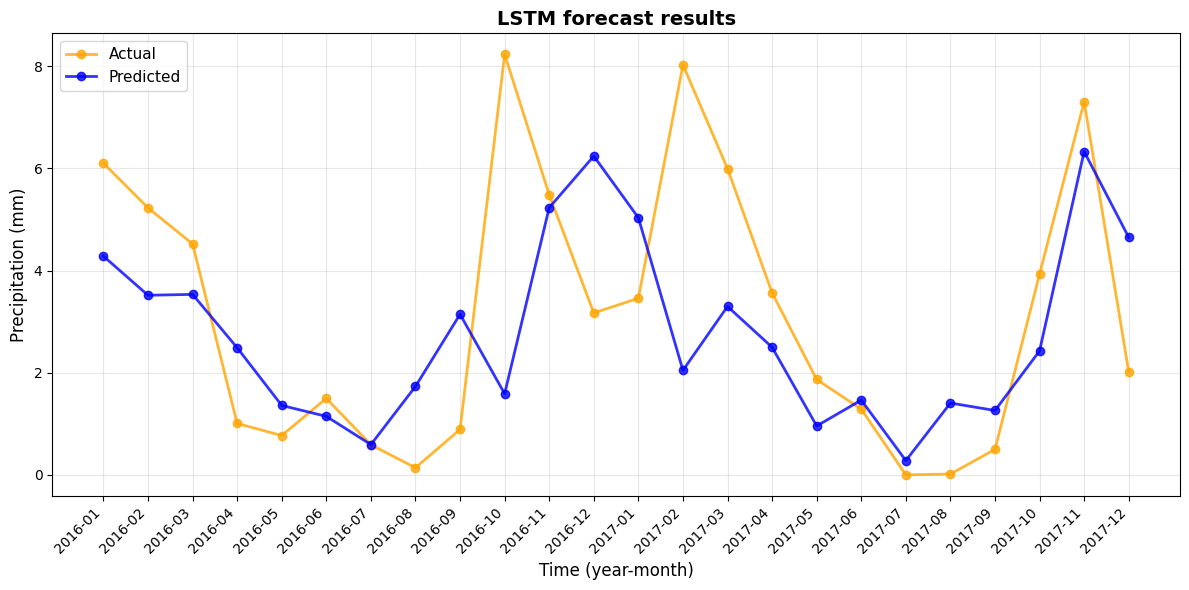


Training Set Results:
  RMSE: 2.34 mm
  MAE: 1.70 mm
  R²: 0.1943


In [14]:
import matplotlib.pyplot as plt

y_pred_test = y_test_pred_list
y_test = y_test_actual_list
x_indices = range(len(y_test))

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(x_indices, y_test, 
         marker='o', linestyle='-', linewidth=2, markersize=6,
         color='orange', label='Actual', alpha=0.8)

# Plot predicted values
plt.plot(x_indices, y_pred_test, 
         marker='o', linestyle='-', linewidth=2, markersize=6,
         color='blue', label='Predicted', alpha=0.8)

# Set x-ticks with date labels
plt.xticks(x_indices, test_months_list, rotation=45, ha='right')

# Customize the plot
plt.xlabel('Time (year-month)', fontsize=12)
plt.ylabel('Precipitation (mm)', fontsize=12)
plt.title('LSTM forecast results', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc = "upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Calculate training metrics
test_rmse = root_mean_squared_error(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"\nTraining Set Results:")
print(f"  RMSE: {test_rmse:.2f} mm")
print(f"  MAE: {test_mae:.2f} mm")
print(f"  R²: {test_r2:.4f}")
